In [1]:
# Scikit Learn
!pip install scikit-learn

In [ ]:
# Feature Selection & Data Preparation
## x = df[..] Feature Columns
## y = df[.] Label Column

In [3]:
# Data Splitting
from sklearn.model_selection import train_test_split
# xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=101)

In [4]:
# Building the Model
from sklearn.linear_model import LinearRegression
## model = LinearRegression(hyper-parameters)

In [5]:
# Train the Model
## model.fit(xtrain,ytrain)

In [6]:
# Performance Evaluation
## model.score(xtest,ytest)

#--------------------------------------------------
## ypred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error, mean_squared_error
## print(mean_absolute_error(ytest, ypred))
## print(mean_squared_error(ytest, ypred))

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [8]:
df = pd.read_csv('housing.csv')

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Statement: Try and build a machine learning model to predict the price of a house to be sold

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Observations
1. No missing data found
2. total seven columns
3. total 5000 rows
4. Price is our target column (label-> )
5. out of 7, 6 columns are float values

In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
df['Price'].nunique()

5000

<b>Observation</b>
1. Target column is continuous numerical

In [14]:
df['Address'].nunique()

5000

In [17]:
for i in df['Address'].head(25):
    print(i)
    print('-'*20)

208 Michael Ferry Apt. 674
Laurabury, NE 37010-5101
--------------------
188 Johnson Views Suite 079
Lake Kathleen, CA 48958
--------------------
9127 Elizabeth Stravenue
Danieltown, WI 06482-3489
--------------------
USS Barnett
FPO AP 44820
--------------------
USNS Raymond
FPO AE 09386
--------------------
06039 Jennifer Islands Apt. 443
Tracyport, KS 16077
--------------------
4759 Daniel Shoals Suite 442
Nguyenburgh, CO 20247
--------------------
972 Joyce Viaduct
Lake William, TN 17778-6483
--------------------
USS Gilbert
FPO AA 20957
--------------------
Unit 9446 Box 0958
DPO AE 97025
--------------------
6368 John Motorway Suite 700
Janetbury, NM 26854
--------------------
911 Castillo Park Apt. 717
Davisborough, PW 78603
--------------------
209 Natasha Stream Suite 961
Huffmanland, NE 52457
--------------------
829 Welch Track Apt. 992
North John, AR 26532-5136
--------------------
PSC 5330, Box 4420
APO AP 08302
--------------------
2278 Shannon View
North Carriemouth, NM 

Observations
1. Address column can not be used as a feature here, because its not having any significant category or numerical data

In [20]:
sns.set_style('darkgrid')

In [21]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

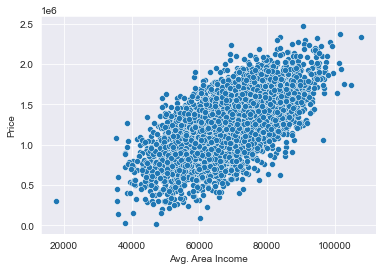

In [22]:
sns.scatterplot(x='Avg. Area Income',y='Price', data=df)

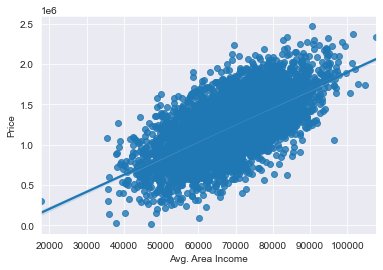

In [27]:
sns.regplot(x='Avg. Area Income',y='Price', data=df)

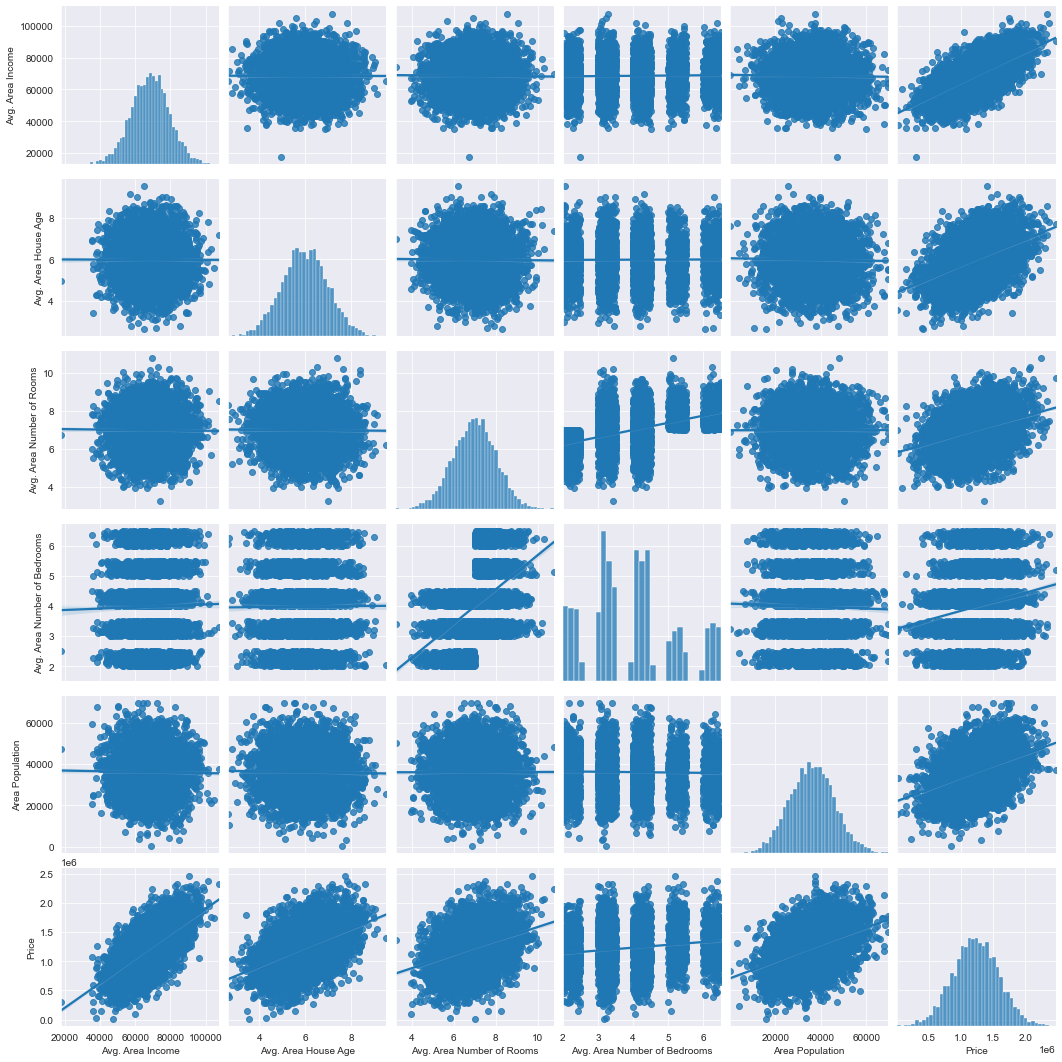

In [28]:
sns.pairplot(df,kind='reg')

In [29]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [30]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472


In [31]:
y = df['Price']

In [32]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [33]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=20)

In [36]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 431 to 2522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [37]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 71 to 1104
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [34]:
model = LinearRegression()

In [35]:
model.fit(xtrain,ytrain)

LinearRegression()

In [39]:
round(model.score(xtest,ytest)*100,2)

91.29

In [40]:
ypred = model.predict(xtest)

In [42]:
xtest.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
71,83953.104839,7.385135,6.898847,37283.357646


In [41]:
ypred

array([1802274.18286326, 1594116.59419079,  823367.99635853, ...,
        757704.94227397, 1028675.5131879 , 1196036.33760771])

In [44]:
ytest.head(1).values

array([1789098.52069149])

Text(0, 0.5, 'Predicted Results')

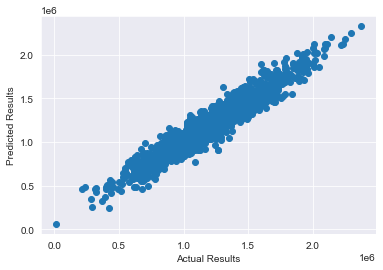

In [47]:
plt.scatter(ytest,ypred)
plt.xlabel('Actual Results')
plt.ylabel('Predicted Results')

In [51]:
pd.to_pickle(model,'house.pkl')

## Deployment of the model

In [52]:
m = pd.read_pickle('house.pkl')

In [53]:
inc = eval(input('Enter the income: '))
age = eval(input('Enter the house age: '))
room = eval(input('Enter the number of rooms: '))
pop = eval(input('Enter the population of the area: '))
query = pd.DataFrame({'inc':[inc],'age':[age],'room':[room],'pop':[pop]})

Enter the income:  20000
Enter the house age:  8
Enter the number of rooms:  5
Enter the population of the area:  60000


In [54]:
result = m.predict(query)

In [55]:
print(round(result[0],0))

638178.0
